## Mercedes Benz Car Testing

In [1]:
#Importing required Libraries & Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Loading the data

In [2]:
cardata = pd.read_csv('train.csv')

In [3]:
cardata.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [4]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
cardata.select_dtypes(include = 'object')

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [6]:
cardata.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cardata = cardata.drop(['ID'],axis=1)

In [8]:
cardata.isnull().sum()

y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

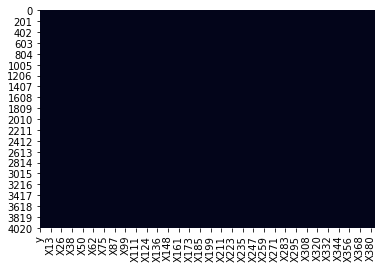

In [9]:
sns.heatmap(cardata.isnull(),cbar=False)

<Figure size 2016x2016 with 0 Axes>

Text(0.5, 1, 'Correlation between different features')

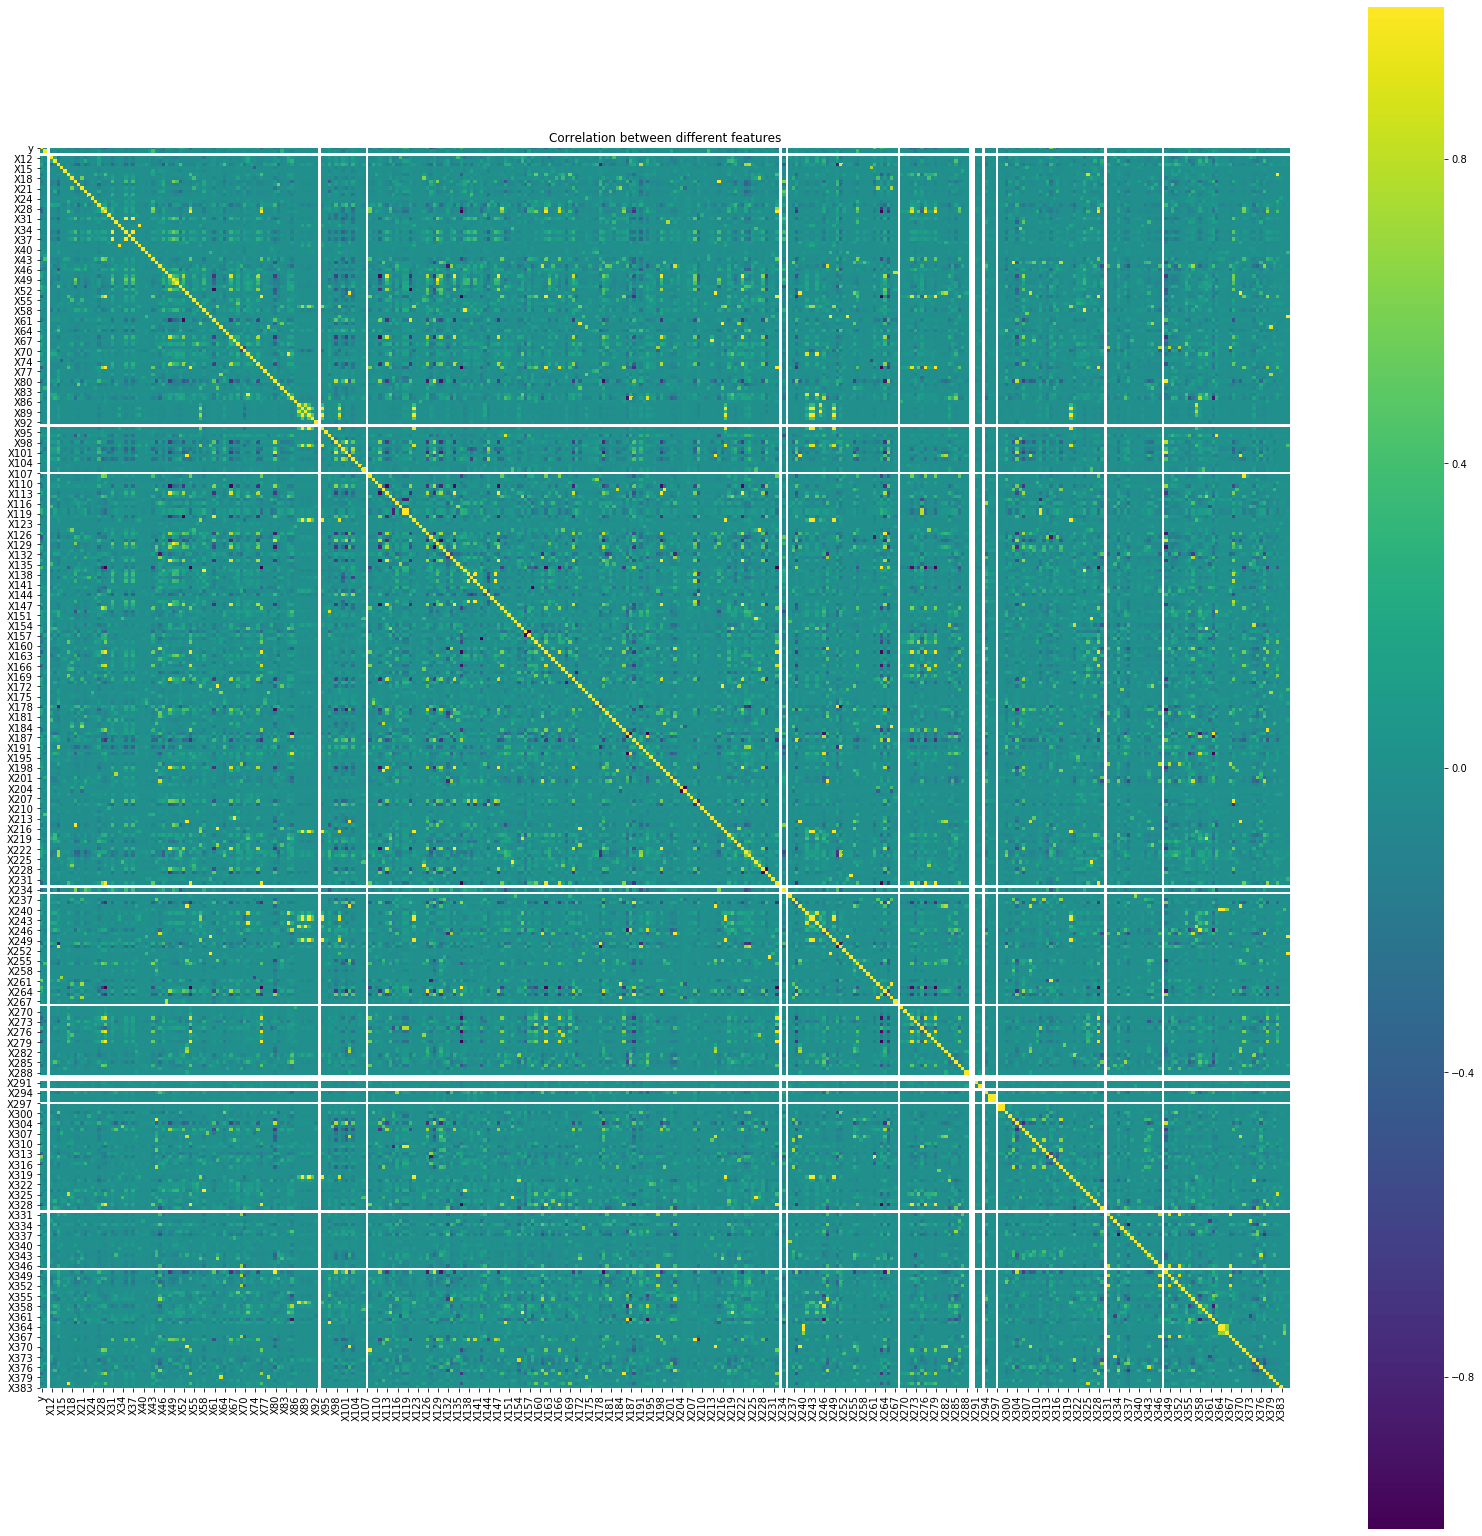

In [10]:
correlation = cardata.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [11]:
correlation

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
y,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,-0.001789,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,-0.010323,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,-0.025327,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,0.048276,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,-0.010525,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,0.040932,-0.010479,NaN,-0.005566,0.023045,0.007743,-0.001968,-0.004619,-0.007899,-0.008022,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,0.085256,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,0.040291,-0.004740,NaN,-0.011628,-0.010125,0.023604,-0.000890,-0.002089,-0.003572,0.062481,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.004591,-0.002532,NaN,-0.006212,0.041242,0.025199,-0.000475,-0.001116,-0.001908,-0.001938,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


### We can see there is no correlation between the features

In [12]:
#Seperating Labels from the data
target = cardata['y']
cardata = cardata.drop(['y'],axis = 1)

In [13]:
target.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [14]:
cardata.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
float_cardata = cardata.select_dtypes(include = ['object']).copy()
float_cardata.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [16]:
#Converting categorical data to numerical data by Label encoding
LabelEncoder = LabelEncoder()

In [17]:
cardata_1 = float_cardata.apply(LabelEncoder.fit_transform)

In [18]:
cardata_1.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [19]:
cardata_2 = cardata.select_dtypes(exclude = ['object']).copy()

In [20]:
cardata_2.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
cardata_features = pd.concat([cardata_1,cardata_2],axis = 1)
cardata_features.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
cardata_1 = pd.concat([target,cardata_features],axis=1)
cardata_1.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
cardata_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int32(8), int64(368)
memory usage: 12.0 MB


## Outlier treatment

In [24]:
def var_summary(x):

    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],

                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [25]:
num_var_summary = cardata_1.apply(var_summary).T
num_var_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
y,4209.0,0.0,423717.16,100.669318,99.15,12.679381,160.766710,72.11,74.87,85.784,88.07,90.82,99.15,109.01,115.25,120.806,137.4304,265.32
X0,4209.0,0.0,125263.00,29.760751,35.00,13.738338,188.741938,0.00,5.00,7.000,8.00,19.00,35.00,43.00,45.00,46.000,46.0000,46.00
X1,4209.0,0.0,46777.00,11.113566,13.00,8.531001,72.777974,0.00,0.00,1.000,1.00,3.00,13.00,20.00,23.00,23.000,26.0000,26.00
X2,4209.0,0.0,72843.00,17.306486,16.00,10.899914,118.808135,0.00,0.00,3.000,3.00,8.00,16.00,25.00,34.00,38.000,40.0000,43.00
X3,4209.0,0.0,12289.00,2.919696,2.00,1.739912,3.027295,0.00,0.00,0.000,0.00,2.00,2.00,5.00,5.00,6.000,6.0000,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,4209.0,0.0,34.00,0.008078,0.00,0.089524,0.008015,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.0000,1.00
X382,4209.0,0.0,32.00,0.007603,0.00,0.086872,0.007547,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.0000,1.00
X383,4209.0,0.0,7.00,0.001663,0.00,0.040752,0.001661,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.0000,1.00
X384,4209.0,0.0,2.00,0.000475,0.00,0.021796,0.000475,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.0000,1.00


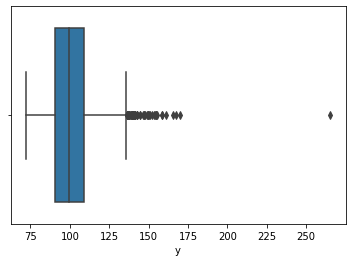

In [26]:
sns.boxplot(cardata_1['y'])

In [27]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    return x

cardata_1 = cardata_1.apply(outlier_capping)

C:\Users\SUBRAMANIAN G\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  


In [28]:
num_var_summary = cardata_1.apply(var_summary).T
num_var_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
y,4209.0,0.0,423167.0072,100.538609,99.15,12.063132,145.519165,72.11,74.87,85.784,88.07,90.82,99.15,109.01,115.25,120.806,137.421568,137.4304
X0,4209.0,0.0,125263.0000,29.760751,35.00,13.738338,188.741938,0.00,5.00,7.000,8.00,19.00,35.00,43.00,45.00,46.000,46.000000,46.0000
X1,4209.0,0.0,46777.0000,11.113566,13.00,8.531001,72.777974,0.00,0.00,1.000,1.00,3.00,13.00,20.00,23.00,23.000,26.000000,26.0000
X2,4209.0,0.0,72754.0000,17.285341,16.00,10.853307,117.794274,0.00,0.00,3.000,3.00,8.00,16.00,25.00,34.00,38.000,40.000000,40.0000
X3,4209.0,0.0,12289.0000,2.919696,2.00,1.739912,3.027295,0.00,0.00,0.000,0.00,2.00,2.00,5.00,5.00,6.000,6.000000,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,4209.0,0.0,0.0000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.0000
X382,4209.0,0.0,0.0000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.0000
X383,4209.0,0.0,0.0000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.0000
X384,4209.0,0.0,0.0000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000000,0.0000


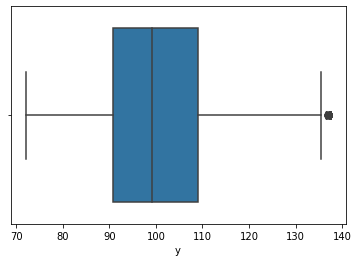

In [29]:
sns.boxplot(cardata_1['y'])

In [30]:
target = cardata_1['y']
cardata_features = cardata_1.drop(['y'],axis = 1)

In [31]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cardata_features = scaler.fit_transform(cardata_features)

In [32]:
#Splitting train & test data
train_x,test_x,train_y,test_y = train_test_split(cardata_features,target,test_size = 0.25,random_state = 1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(3156, 376)

(1053, 376)

(3156,)

(1053,)

## Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lr.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on train set: {}".format(lr.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: 0.6326740810067712
Coefficient of determination R^2 <-- on train set: 0.5967721166943228


In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,test_x,test_y,cv=5)
score.mean()

-1.9203393656258922e+21

 ## PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(cardata_features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_ratio_[:100].sum()

0.9665865871106158

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

Text(100, 0.9, '100')

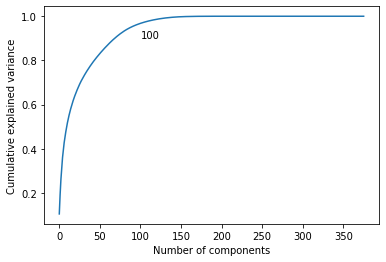

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('100',xy=(100, .90))

In [39]:
x_pca = PCA(n_components=100)
cardata_features_pca = x_pca.fit_transform(cardata_features)

Text(0.5, 1, 'Correlation between different features')

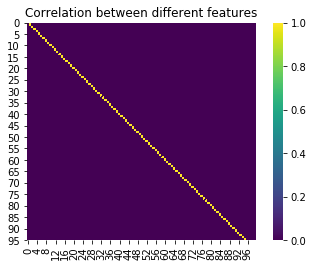

In [40]:
correlation = pd.DataFrame(cardata_features_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [41]:
train_x,test_x,train_y,test_y = train_test_split(cardata_features_pca,target,test_size = 0.25,random_state = 1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(3156, 100)

(1053, 100)

(3156,)

(1053,)

In [42]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lr.score(train_x, train_y)))

Coefficient of determination R^2 <-- on train set: 0.6094371049944762


In [44]:
print("Coefficient of determination R^2 <-- on test set: {}".format(lr.score(test_x, test_y)))

Coefficient of determination R^2 <-- on test set: 0.6055281838912644


In [45]:
predict_test_pca = lr.predict(test_x)
predict_test_pca

array([ 75.7380642 , 110.29516375, 110.93650956, ..., 108.52439675,
        96.81372076, 111.59693181])

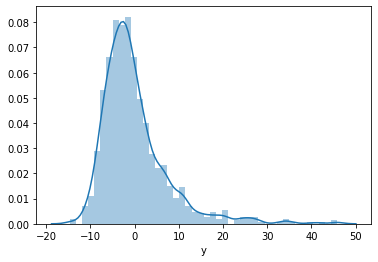

In [46]:
sns.distplot(test_y-predict_test_pca)

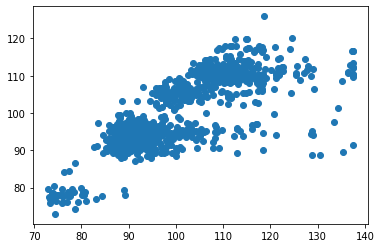

In [47]:
plt.scatter(test_y,predict_test_pca)

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(test_y, predict_test_pca))
print('MSE:', metrics.mean_squared_error(test_y, predict_test_pca))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predict_test_pca)))

MAE: 5.2928914643773615
MSE: 57.51890570796383
RMSE: 7.5841219470657135


## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=3)
tree.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [52]:
print("Coefficient of determination R^2 <-- on train set: {}".format(tree.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on test set: {}".format(tree.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: 0.333021688038034
Coefficient of determination R^2 <-- on test set: 0.28538162786237253


In [53]:
predict_test_tree = tree.predict(test_x)
predict_test_tree

array([ 77.43225   ,  98.44417787, 109.18076237, ..., 109.18076237,
        98.44417787,  98.44417787])

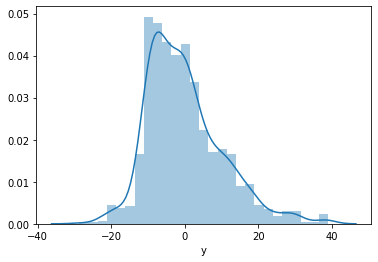

In [54]:
sns.distplot(test_y-predict_test_tree)

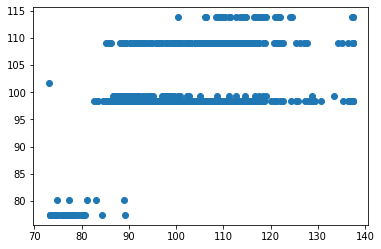

In [55]:
plt.scatter(test_y,predict_test_tree)

In [56]:
print('MAE:', metrics.mean_absolute_error(test_y, predict_test_tree))
print('MSE:', metrics.mean_squared_error(test_y, predict_test_tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predict_test_tree)))

MAE: 7.91869857138028
MSE: 104.20026244113856
RMSE: 10.207852979012705


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
RFregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [59]:
RFregressor.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [60]:
print("Coefficient of determination R^2 <-- on train set: {}".format(RFregressor.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on test set: {}".format(RFregressor.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: 0.9156806878389353
Coefficient of determination R^2 <-- on test set: 0.5183628489441083


In [61]:
predict_test_forest = RFregressor.predict(test_x)

In [62]:
print('MAE:', metrics.mean_absolute_error(test_y, predict_test_forest))
print('MSE:', metrics.mean_squared_error(test_y, predict_test_forest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predict_test_forest)))

MAE: 6.130681291769567
MSE: 70.22869757924558
RMSE: 8.380256414886455


## Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [94]:
n_estimators = [50,100,150,170,200,230,250]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(10,30, num = 1)]
max_depth.append(None)
min_samples_split = [5,4,6,7,3]
min_samples_leaf = [10,15,20]
bootstrap = [True, False]

In [95]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [96]:
print(random_grid)

{'n_estimators': [50, 100, 150, 170, 200, 230, 250], 'max_features': ['auto'], 'max_depth': [10, None], 'min_samples_split': [5, 4, 6, 7, 3], 'min_samples_leaf': [10, 15, 20], 'bootstrap': [True, False]}


In [97]:
rf = RandomForestRegressor(random_state = 42)

In [98]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [99]:
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...0

In [101]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf_random.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on test set: {}".format(rf_random.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: 0.7133576818334892
Coefficient of determination R^2 <-- on test set: 0.5635943730430486


In [102]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300,500,700, 1000]}

In [106]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [107]:
grid_search.fit(train_x,train_y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  9.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [

In [108]:
print("Coefficient of determination R^2 <-- on train set: {}".format(grid_search.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on test set: {}".format(grid_search.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: 0.7746400253136579
Coefficient of determination R^2 <-- on test set: 0.462481767452165


In [ ]:
import sklearn.

## Xgboost Regressor

In [73]:
import xgboost as xgb

In [74]:
xgb_regressor = xgb.XGBRegressor()

In [75]:
xgb_regressor.fit(train_x,train_y)

[21:20:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [76]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xgb_regressor.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on test set: {}".format(xgb_regressor.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: 0.6890460828048138
Coefficient of determination R^2 <-- on test set: 0.5729248296598398


In [77]:
prediction_xgb=xgb_regressor.predict(test_x)

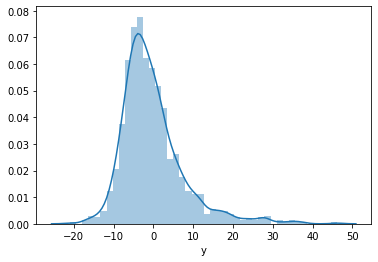

In [78]:
sns.distplot(test_y-prediction_xgb)

plt.scatter(test_y,prediction_xgb)

## Hyper Parameter tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [81]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [87]:
xg_random = RandomizedSearchCV(estimator = xgb_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', cv = 4,n_iter = 100, verbose=2, random_state=42, n_jobs = -1)

In [88]:
xg_random.fit(train_x,train_y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 707.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 714.4min finished
C:\Users\SUBRAMANIAN G\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                             

In [89]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xg_random.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on test set: {}".format(xg_random.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: -15.209454337555963
Coefficient of determination R^2 <-- on test set: -63.29666919930889


## KNN

In [67]:
from sklearn import neighbors

In [80]:
model_knn = neighbors.KNeighborsRegressor()

In [81]:
model_knn.fit(train_x, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [82]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model_knn.score(train_x, train_y)))
print("Coefficient of determination R^2 <-- on test set: {}".format(model_knn.score(test_x, test_y)))

Coefficient of determination R^2 <-- on train set: 0.6223149140690066
Coefficient of determination R^2 <-- on test set: 0.46138028014693644
